**1.Data** **Aquisition**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
final_df = pd.read_csv(r"/content/task.csv")

In [7]:
final_df

,Id,Tweet,Emotion,Intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
7092,41528,Why does Candice constantly pout #GBBO 💄😒,sadness,0.396
7093,41529,"@redBus_in #unhappy with #redbus CC, when I ta...",sadness,0.604
7094,41530,"@AceOperative789 no pull him afew weeks ago, s...",sadness,0.479
7095,41531,I'm buying art supplies and I'm debating how s...,sadness,0.375


**1.2 Under Standing The Data**





In [8]:
final_df.head()

,Id,Tweet,Emotion,Intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [9]:
#basic Information About the data Set
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7097 entries, 0 to 7096
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         7097 non-null   int64  
 1   Tweet      7097 non-null   object 
 2   Emotion    7097 non-null   object 
 3   Intensity  7097 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 221.9+ KB


In [10]:
#Checking for null values in the dataset
print(final_df.isnull().sum().sort_values(ascending=False))

Id           0
Tweet        0
Emotion      0
Intensity    0
dtype: int64


In [11]:
#Checking For duplicated values in the data set
final_df.duplicated().sum()

0

### Performing Eda

<Axes: ylabel='Emotion'>

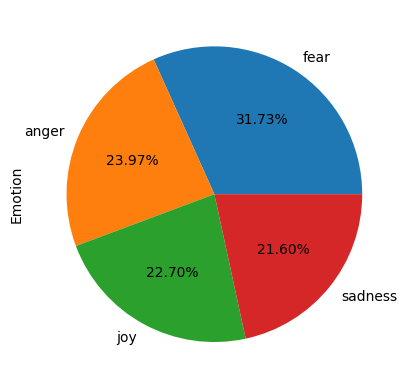

In [12]:
final_df['Emotion'].value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: >

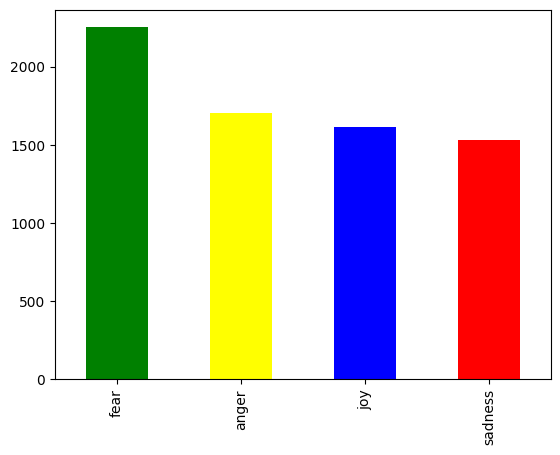

In [13]:
final_df['Emotion'].value_counts().plot(kind='bar',color=['Green','yellow','blue','red'])

In [14]:
!pip install ydata_profiling
from ydata_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 29.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=b89436ba3d9f2bae367952d3dc01d298da7a7503f249451afb0dcd7d077a1b9f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling 

In [15]:
prof = ProfileReport(final_df)

In [16]:
prof.to_file(output_file='sentiment_report.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### **2.Text Preprocessing**

### 2.1 Lower Casing

In [17]:


def lower_casing(txt):
    txt = txt.lower()
    return txt

In [18]:
final_df['Tweet'] = final_df['Tweet'].apply(lambda x : lower_casing(x))

In [19]:
final_df

,Id,Tweet,Emotion,Intensity
0,10000,how the fu*k! who the heck! moved my fridge!.....,anger,0.938
1,10001,so my indian uber driver just called someone t...,anger,0.896
2,10002,@dpd_uk i asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,don't join @btcare they put the phone down on ...,anger,0.896
...,...,...,...,...
7092,41528,why does candice constantly pout #gbbo 💄😒,sadness,0.396
7093,41529,"@redbus_in #unhappy with #redbus cc, when i ta...",sadness,0.604
7094,41530,"@aceoperative789 no pull him afew weeks ago, s...",sadness,0.479
7095,41531,i'm buying art supplies and i'm debating how s...,sadness,0.375


### 2.2 Removing Punctuations

In [20]:
import string
punctuation_marks = string.punctuation
def remove_punctuation(txt):
    for char in punctuation_marks:
        txt = txt.replace(char,'')
    return txt

In [21]:
final_df['Tweet'] = final_df['Tweet'].apply(lambda x: remove_punctuation(x))

In [22]:
final_df

,Id,Tweet,Emotion,Intensity
0,10000,how the fuk who the heck moved my fridge shoul...,anger,0.938
1,10001,so my indian uber driver just called someone t...,anger,0.896
2,10002,dpduk i asked for my parcel to be delivered to...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,dont join btcare they put the phone down on yo...,anger,0.896
...,...,...,...,...
7092,41528,why does candice constantly pout gbbo 💄😒,sadness,0.396
7093,41529,redbusin unhappy with redbus cc when i talked ...,sadness,0.604
7094,41530,aceoperative789 no pull him afew weeks ago sad...,sadness,0.479
7095,41531,im buying art supplies and im debating how ser...,sadness,0.375


### 2.3 Chat Word Treetment

In [23]:
chat_dictionary = {
    "lol": "Laugh out loud",
    "brb": "Be right back",
    "ttyl": "Talk to you later",
    "rofl": "Rolling on the floor laughing",
    "lmao": "Laughing my ass off",
    "omg": "Oh my god",
    "btw": "By the way",
    "fyi": "For your information",
    "idk": "I don't know",
    "imho": "In my humble opinion",
    "jk": "Just kidding",
    "np": "No problem",
    "thx": "Thanks",
    "gtg": "Got to go",
    "irl": "In real life",
    "bff": "Best friends forever",
    "smh": "Shaking my head",
    "tbh": "To be honest",
    "afk": "Away from keyboard",
    "gr8": "Great",
    "omw": "On my way",
    "icymi": "In case you missed it",
    "til": "Today I learned",
    "srsly": "Seriously",
    "fyi": "For your information",
    "afaik": "As far as I know",
    "btw": "By the way",
    "fomo": "Fear of missing out",
    "hmu": "Hit me up",
    "imo": "In my opinion",
    "nvm": "Never mind",
    "sry": "Sorry",
    "tmi": "Too much information",
    "wth": "What the heck",
    "yw": "You're welcome",
    "dw": "Don't worry",
    "fml": "F**k my life",
    "hbd": "Happy birthday",
    "idc": "I don't care",
    "tbt": "Throwback Thursday",
    "tgif": "Thank god it's Friday",
    "wbu": "What about you",
    "wfh": "Work from home",
    "yolo": "You only live once",
    "imo": "In my opinion",
    "ttyt": "Talk to you tomorrow",
    "gg": "Good game",
    "idgi": "I don't get it",
    "smth": "Something",
    "tl;dr": "Too long; didn't read",
}
def chatword_normal(txt):
    final_text = []
    for i in txt.split():
        if i in chat_dictionary:
            final_text.append(chat_dictionary[i])
        else:
            final_text.append(i)
    return ' '.join(final_text)

In [24]:
final_df['Tweet'] = final_df['Tweet'].apply(lambda x: chatword_normal(x))

In [25]:
final_df

,Id,Tweet,Emotion,Intensity
0,10000,how the fuk who the heck moved my fridge shoul...,anger,0.938
1,10001,so my indian uber driver just called someone t...,anger,0.896
2,10002,dpduk i asked for my parcel to be delivered to...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,dont join btcare they put the phone down on yo...,anger,0.896
...,...,...,...,...
7092,41528,why does candice constantly pout gbbo 💄😒,sadness,0.396
7093,41529,redbusin unhappy with redbus cc when i talked ...,sadness,0.604
7094,41530,aceoperative789 no pull him afew weeks ago sad...,sadness,0.479
7095,41531,im buying art supplies and im debating how ser...,sadness,0.375


### 2.4 stop word Elimination


In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
from nltk.corpus import stopwords
stw=stopwords.words('english')

In [28]:
def remove_stopwords(txt):
    new_one = []
    for word in txt.split():
        if word in stw:
            new_one.append('')
        else:
            new_one.append(word)
    x=new_one[:]
    new_one.clear()
    return " ".join(x)

In [29]:
final_df['Tweet'] = final_df['Tweet'].apply(lambda x:remove_stopwords(x))

In [30]:
final_df

,Id,Tweet,Emotion,Intensity
0,10000,fuk heck moved fridge knock landlord d...,anger,0.938
1,10001,indian uber driver called someone n word ...,anger,0.896
2,10002,dpduk asked parcel delivered pick stor...,anger,0.896
3,10003,ef whichever butt wipe pulled fire alarm da...,anger,0.896
4,10004,dont join btcare put phone talk rude ...,anger,0.896
...,...,...,...,...
7092,41528,candice constantly pout gbbo 💄😒,sadness,0.396
7093,41529,redbusin unhappy redbus cc talked week ...,sadness,0.604
7094,41530,aceoperative789 pull afew weeks ago sadly th...,sadness,0.479
7095,41531,im buying art supplies im debating serious ...,sadness,0.375


### 2.5 Handling Emojis


In [31]:
!pip install emoji
import emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 4.3 MB/s eta 0:00:00


In [32]:
def Handle_emoji(txt):
    return emoji.demojize(txt).replace(":","")

In [33]:
final_df['Tweet'] = final_df['Tweet'].apply(lambda x: Handle_emoji(x))

In [34]:
final_df

,Id,Tweet,Emotion,Intensity
0,10000,fuk heck moved fridge knock landlord d...,anger,0.938
1,10001,indian uber driver called someone n word ...,anger,0.896
2,10002,dpduk asked parcel delivered pick stor...,anger,0.896
3,10003,ef whichever butt wipe pulled fire alarm da...,anger,0.896
4,10004,dont join btcare put phone talk rude ...,anger,0.896
...,...,...,...,...
7092,41528,candice constantly pout gbbo lipstickunamuse...,sadness,0.396
7093,41529,redbusin unhappy redbus cc talked week ...,sadness,0.604
7094,41530,aceoperative789 pull afew weeks ago sadly th...,sadness,0.479
7095,41531,im buying art supplies im debating serious ...,sadness,0.375


### 2.6 Stemming


In [35]:
from nltk.stem.porter import PorterStemmer

In [36]:
ps = PorterStemmer()

In [37]:
def stem_word(txt):
    return " ".join([ps.stem(word) for word in txt.split()])

In [38]:
final_df['Tweet'] = final_df['Tweet'].apply(lambda x: stem_word(x))

In [39]:
final_df

,Id,Tweet,Emotion,Intensity
0,10000,fuk heck move fridg knock landlord door angri mad,anger,0.938
1,10001,indian uber driver call someon n word wasnt mo...,anger,0.896
2,10002,dpduk ask parcel deliv pick store address fume...,anger,0.896
3,10003,ef whichev butt wipe pull fire alarm davi bc s...,anger,0.896
4,10004,dont join btcare put phone talk rude take mone...,anger,0.896
...,...,...,...,...
7092,41528,candic constantli pout gbbo lipstickunamused_fac,sadness,0.396
7093,41529,redbusin unhappi redbu cc talk week still didn...,sadness,0.604
7094,41530,aceoperative789 pull afew week ago sadli there...,sadness,0.479
7095,41531,im buy art suppli im debat seriou buy acryl paint,sadness,0.375


### 2.7 Lemmatization

In [40]:
from nltk.stem import WordNetLemmatizer

In [41]:
lemma = WordNetLemmatizer()

In [42]:
def lemma_word(txt):
    return " ".join([lemma.lemmatize(word) for word in txt.split()])

In [43]:
import nltk
nltk.download('wordnet')
final_df['Tweet'] = final_df['Tweet'].apply(lambda x: lemma_word(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


### **3.Visualization**

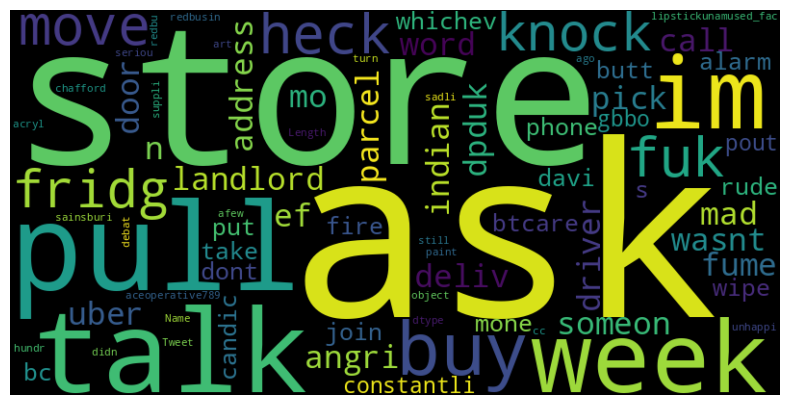

In [44]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(str(final_df['Tweet']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **4 Feature Engineering**

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
features = vectorizer.fit_transform(final_df["Tweet"])

In [48]:
encoded_intensities = final_df["Intensity"].values.reshape(-1, 1)

### **5.Model Building**

In [53]:
from sklearn.model_selection import train_test_split
X_train_emotion, X_test_emotion, y_train_emotion, y_test_emotion = train_test_split(features, final_df["Emotion"], test_size=0.2)

In [54]:
from sklearn.svm import SVC

emotion_model = SVC()
emotion_model.fit(X_train_emotion, y_train_emotion)

0.8746478873239436

In [57]:
X_train_intensity, X_test_intensity, y_train_intensity, y_test_intensity = train_test_split(features, encoded_intensities, test_size=0.2)

In [66]:
from sklearn.ensemble import RandomForestRegressor

intensity_model = RandomForestRegressor()
intensity_model.fit(X_train_intensity, y_train_intensity)

<ipython-input-66-9a68a333121c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  intensity_model.fit(X_train_intensity, y_train_intensity)


RandomForestRegressor()

### **6.Prediction**

In [88]:
new_tweet = "My blood is boiling"
new_features = vectorizer.transform([new_tweet])

predicted_emotion = emotion_model.predict(new_features)[0]
predicted_intensity = intensity_model.predict(new_features)

print("Predicted Emotion:", predicted_emotion)
print("Predicted Intensity:", predicted_intensity)

Predicted Emotion: anger
Predicted Intensity: [0.70270521]
